# Load Libraries

In [119]:
#load libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diabetes.csv')

# Data Exploration 

In [3]:
df.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 51)

**The dataframe has 101766 rows and 51 columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

## Check for duplicate values in 'id', 'encounter_id' and 'patient_nbr'

In [6]:
print(df.duplicated(subset=['id']).sum())

0


In [7]:
print(df.duplicated(subset=['encounter_id']).sum())

0


In [8]:
print(df.duplicated(subset=['patient_nbr']).sum())

30248


### Further exploration into 'patient_nbr'

In [9]:
cc = df['patient_nbr'].value_counts()
cc_df = pd.DataFrame({'Patient No.': cc.index, 'Count': cc.values})
fil_cc_df = cc_df.loc[cc_df['Count'] != 1]
fil_cc_df.head()

,Patient No.,Count
0,88785891,40
1,43140906,28
2,1660293,23
3,88227540,23
4,23199021,23


**I removed the duplicate patient_nbr with their rows because if we have too many of the same patient we risk tailoring the model to predict their health specifically instead of it being to predict everyone. This would make the model unrealiable.**

In [10]:
df = df.drop_duplicates(subset='patient_nbr', keep='first')
df.shape

(71518, 51)

In [11]:
print(df.duplicated(subset=['patient_nbr']).sum())

0


## Check for missing data

In [12]:
df.isnull().sum()

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamid

In [13]:
cc = df['weight'].value_counts()
cc_df = pd.DataFrame({'Weight': cc.index, 'Count': cc.values})
print(cc_df)

      Weight  Count
0          ?  68665
1   [75-100)   1195
2    [50-75)    781
3  [100-125)    566
4  [125-150)    131
5    [25-50)     89
6     [0-25)     46
7  [150-175)     33
8  [175-200)      9
9       >200      3


<strong>Missing values are represented by a question mark</strong>

In [14]:
#replace '?' with NaN
df.replace('?', np.nan, inplace = True)

#check where the missing values are in the dataframe
df.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         1948
gender                          0
age                             0
weight                      68665
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  31043
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         11
diag_2                        294
diag_3                       1225
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

#### Remove columns that are no longer useful

In [15]:
del df['weight'] #more than 95% of the data is missing
del df['id']
del df['encounter_id']
del df['patient_nbr']

In [16]:
#check where the missing values are in the dataframe
df.isnull().sum()

race                         1948
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  31043
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         11
diag_2                        294
diag_3                       1225
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [17]:
cc = df['race'].value_counts()
cc_df = pd.DataFrame({'Race': cc.index, 'Count': cc.values})
print(cc_df)

              Race  Count
0        Caucasian  53491
1  AfricanAmerican  12887
2         Hispanic   1517
3            Other   1178
4            Asian    497


In [18]:
df['race'].isnull().sum()

1948

In [19]:
#We'll use the the classification of 'Other' to replace the missing values
#since it is already established
df['race'].fillna('Other', inplace=True)

In [20]:
cc = df['race'].value_counts()
cc_df = pd.DataFrame({'Race': cc.index, 'Count': cc.values})
print(cc_df)
print()

              Race  Count
0        Caucasian  53491
1  AfricanAmerican  12887
2            Other   3126
3         Hispanic   1517
4            Asian    497



In [21]:
#check if all missing values were replaced
df['race'].isnull().sum()

0

**I'll do weighted amputation to keep the data more or less consistant.**

In [22]:
cc = df['payer_code'].value_counts()
cc_df = pd.DataFrame({'Payer Code': cc.index, 'Count': cc.values})
print(cc_df)

   Payer Code  Count
0          MC  20414
1          HM   4022
2          BC   3432
3          SP   3347
4          MD   2197
5          CP   1986
6          UN   1879
7          CM   1334
8          OG    658
9          PO    463
10         DM    374
11         CH    117
12         WC    117
13         OT     65
14         SI     37
15         MP     32
16         FR      1


In [23]:
df['payer_code'].isnull().sum()

31043

In [24]:
#Function to perform the random sampling
def wrc(column):
    cp = df[column].value_counts(normalize=True)
    cat_weight = {cat: size for cat, size in cp.items()}
    choices = cp.index
    weights = cp.values
    return random.choices(choices, weights=weights, k=1)[0]

In [25]:
missing_vals = df[df['payer_code'].isnull()].index

for index in missing_vals:
    ic = wrc('payer_code')
    df.at[index, 'payer_code'] = ic

In [26]:
#check if all missing values were replaced
df['payer_code'].isnull().sum()

0

**Now we move on to the medical speciality column**

In [27]:
cc = df['medical_specialty'].value_counts()
cc_df = pd.DataFrame({'Medical Specialty': cc.index, 'Count': cc.values})
print(cc_df)

         Medical Specialty  Count
0         InternalMedicine  10919
1   Family/GeneralPractice   5118
2         Emergency/Trauma   4465
3               Cardiology   4266
4          Surgery-General   2221
..                     ...    ...
65          SportsMedicine      1
66             Dermatology      1
67              Proctology      1
68    Psychiatry-Addictive      1
69                Resident      1

[70 rows x 2 columns]


In [28]:
df['medical_specialty'].isnull().sum()

34477

**We can use the function we wrote earlier to replace the missing variables since this is a categorical variable column**

In [29]:
missing_vals = df[df['medical_specialty'].isnull()].index

for index in missing_vals:
    ic = wrc('medical_specialty')
    df.at[index, 'medical_specialty'] = ic

In [30]:
#check if all missing values were replaced
df['medical_specialty'].isnull().sum()

0

### diag_1

In [31]:
cc = df['diag_1'].value_counts()
cc_df = pd.DataFrame({'Diagnosis 1': cc.index, 'Count': cc.values})
print(cc_df)

    Diagnosis 1  Count
0           414   5233
1           428   3980
2           786   3040
3           410   2902
4           486   2439
..          ...    ...
691         653      1
692          61      1
693         145      1
694         148      1
695         V51      1

[696 rows x 2 columns]


In [32]:
df['diag_1'].info()

<class 'pandas.core.series.Series'>
Int64Index: 71518 entries, 0 to 101765
Series name: diag_1
Non-Null Count  Dtype 
--------------  ----- 
71507 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [33]:
df['diag_1'].isnull().sum()

11

**We can use the function we wrote earlier to replace the missing variables since this is a categorical variable column**

In [34]:
missing_vals = df[df['diag_1'].isnull()].index

for index in missing_vals:
    ic = wrc('diag_1')
    df.at[index, 'diag_1'] = ic

In [35]:
#check if all missing values were replaced
df['diag_1'].isnull().sum()

0

### diag_2

In [36]:
cc = df['diag_2'].value_counts()
cc_df = pd.DataFrame({'Diagnosis 1': cc.index, 'Count': cc.values})
print(cc_df)

    Diagnosis 1  Count
0           250   5009
1           276   4604
2           428   4335
3           427   3539
4           401   3088
..          ...    ...
720         704      1
721         911      1
722         520      1
723        E890      1
724         927      1

[725 rows x 2 columns]


In [38]:
df['diag_2'].isnull().sum()

294

**We can use the function we wrote earlier to replace the missing variables since this is a categorical variable column**

In [39]:
missing_vals = df[df['diag_2'].isnull()].index

for index in missing_vals:
    ic = wrc('diag_2')
    df.at[index, 'diag_2'] = ic

In [40]:
#check if all missing values were replaced
df['diag_2'].isnull().sum()

0

### diag_3

In [41]:
cc = df['diag_3'].value_counts()
cc_df = pd.DataFrame({'Diagnosis 1': cc.index, 'Count': cc.values})
print(cc_df)

    Diagnosis 1  Count
0           250   9039
1           401   6588
2           276   3448
3           428   2847
4           427   2707
..          ...    ...
753        E882      1
754         243      1
755         171      1
756         754      1
757         971      1

[758 rows x 2 columns]


In [42]:
df['diag_3'].info()

<class 'pandas.core.series.Series'>
Int64Index: 71518 entries, 0 to 101765
Series name: diag_3
Non-Null Count  Dtype 
--------------  ----- 
70293 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [43]:
df['diag_3'].isnull().sum()

1225

**We can use the function we wrote earlier to replace the missing variables since this is a categorical variable column**

In [44]:
missing_vals = df[df['diag_3'].isnull()].index

for index in missing_vals:
    ic = wrc('diag_3')
    df.at[index, 'diag_3'] = ic

In [45]:
#check if all missing values were replaced
df['diag_3'].isnull().sum()

0

**check if dataframe still contains any missing values**

In [46]:
#check where the missing values are in the dataframe
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   payer_code                71518 non-null  object
 8   medical_specialty         71518 non-null  object
 9   num_lab_procedures        71518 non-null  int64 
 10  num_procedures            71518 non-null  int64 
 11  num_medications           71518 non-null  int64 
 12  number_outpatient         71518 non-null  int64 
 13  number_emergency          71518 non-null  int64 
 14  number_inpatient     

### Perform a Chi-Square test to make sure that our y-variables aren't closely related to each other

#### Step 1: Hypothesis
$H_{0}$ - There is no association between 'diabetesMed', 'change', and 'readmitted'
$H_{1}$ - There is an association between 'diabetesMed', 'change', and 'readmitted'

#### Step 2: Significance Level $(\alpha)$
$\alpha = 0.05$

In [48]:
alpha = 0.05

#### Step 3: Contingency Tables

In [49]:
ct = pd.crosstab(df['diabetesMed'], df['change'], df['readmitted'], aggfunc='size')

In [50]:
print(ct)

change            Ch       No
diabetesMed                  
No               NaN  17199.0
Yes          32024.0  22295.0


In [51]:
df1 = df[['diabetesMed', 'change', 'readmitted']]
df1.head()

,diabetesMed,change,readmitted
0,No,No,NO
1,Yes,Ch,>30
2,Yes,No,NO
3,Yes,Ch,NO
4,Yes,Ch,NO


In [52]:
df1.isnull().sum()

diabetesMed    0
change         0
readmitted     0
dtype: int64

In [53]:
ct1 = pd.crosstab(df['diabetesMed'], df['change'])
ct2 = pd.crosstab(df['readmitted'], df['change'])
ct3 = pd.crosstab(df['readmitted'], df['diabetesMed'])

In [54]:
print(ct1)

change          Ch     No
diabetesMed              
No               0  17199
Yes          32024  22295


In [55]:
print(ct2)

change         Ch     No
readmitted              
<30          2979   3314
>30         10482  11758
NO          18563  24422


In [56]:
print(ct3)

diabetesMed     No    Yes
readmitted               
<30           1263   5030
>30           4644  17596
NO           11292  31693


**The problem in here is the Ch in Change and the No in diabetesMed, there is a 0 which causes a NaN value in the overall contingency table. therefore we replace NaN with 0**

In [57]:
ct.fillna(0, inplace=True)

#### Step 4: Calculate expected frequencies

In [58]:
chi2_stat, p, dof, ef = chi2_contingency(ct)
print("Expected Frequencies:\n", ef)

Expected Frequencies:
 [[ 7701.28885036  9497.71114964]
 [24322.71114964 29996.28885036]]


#### Step 5: Calculate Chi-Square Statistic
$X^{2} = \sum(\frac{(Observed - Expected)^{2}}{Expected})$

In [59]:
print("Chi-Square:\n", chi2_stat)

Chi-Square:
 18359.24647441935


#### Step 6: Degrees of Freedom

In [60]:
print("Degrees of Freedom:\n", dof)

Degrees of Freedom:
 1


#### Step 7: P-value

In [61]:
print("p-value:\n", round(p, 6))

p-value:
 0.0


#### Step 8: Compare Test Statistic with Critical Value or p-value

**Using p-value**

In [62]:
if p < alpha:
    print(f"The null hypothesis is rejected. The p-value, {p}, is smaller than alpha = {alpha}, there is a relationship between 'diabetesMed', 'change', and, 'readmitted'.")
else:
    print(f"We do not rejected. The p-value, {p}, is greater than alpha = {alpha}, there is no relationship between 'diabetesMed', 'change', and, 'readmitted'.")

The null hypothesis is rejected. The p-value, 0.0, is smaller than alpha = 0.05, there is a relationship between 'diabetesMed', 'change', and, 'readmitted'.


**Using Critical Value**

In [63]:
cv = chi2.ppf(1-alpha, dof)

In [64]:
if cv < chi2_stat:
    print(f"The null hypothesis is rejected. The critical value, {cv}, is smaller than the chi-square statistic = {chi2_stat}, there is a relationship between 'diabetesMed', 'change', and, 'readmitted'.")
else:
    print(f"We do not rejected. The critical value, {cv}, is greater than the chi-square statistic = {chi2_stat}, there is no relationship between 'diabetesMed', 'change', and, 'readmitted'.")

The null hypothesis is rejected. The critical value, 3.841458820694124, is smaller than the chi-square statistic = 18359.24647441935, there is a relationship between 'diabetesMed', 'change', and, 'readmitted'.


#### Conclusion

In conclusion the null hypothesis is not rejected, therefore there is no relationship between the three columns, 'readmitted', 'change' and 'diabetesMed'. Since there is no relationship or very little relationship between the three columns, it is okay to use them as dependent (y) variables.

## Feature Engineering

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   payer_code                71518 non-null  object
 8   medical_specialty         71518 non-null  object
 9   num_lab_procedures        71518 non-null  int64 
 10  num_procedures            71518 non-null  int64 
 11  num_medications           71518 non-null  int64 
 12  number_outpatient         71518 non-null  int64 
 13  number_emergency          71518 non-null  int64 
 14  number_inpatient     

In [66]:
num_df = df.select_dtypes(include='number')
num_cols = num_df.columns.tolist()
print(num_cols)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


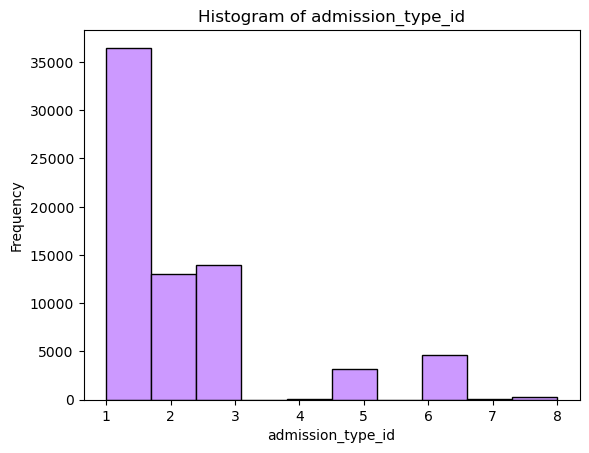

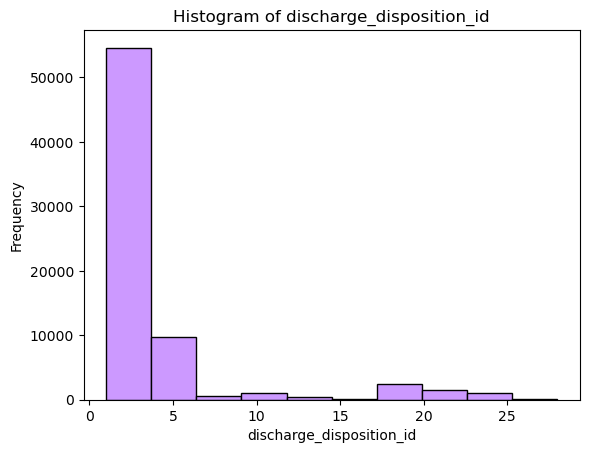

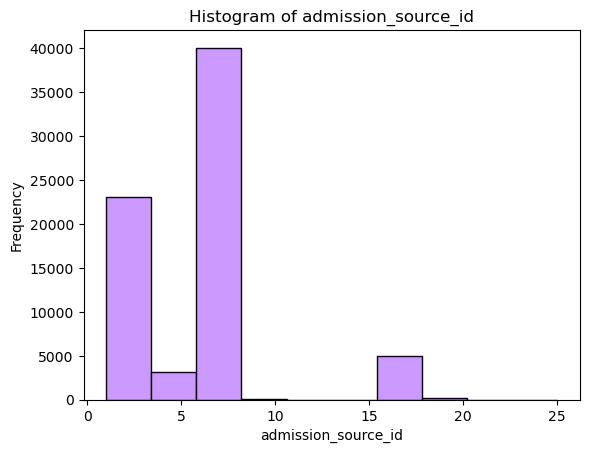

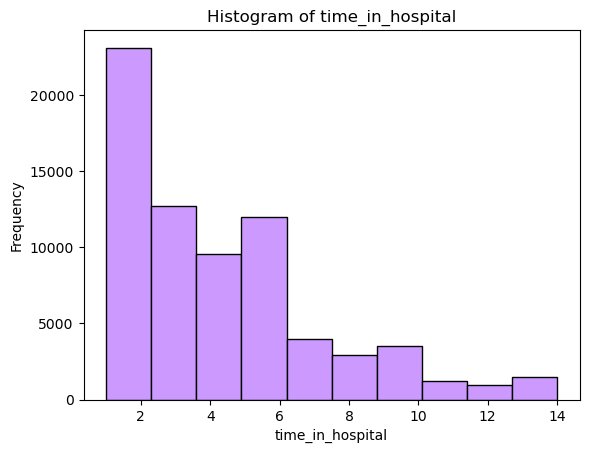

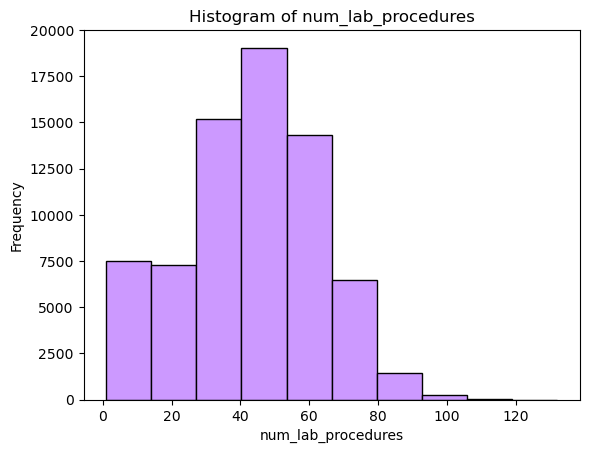

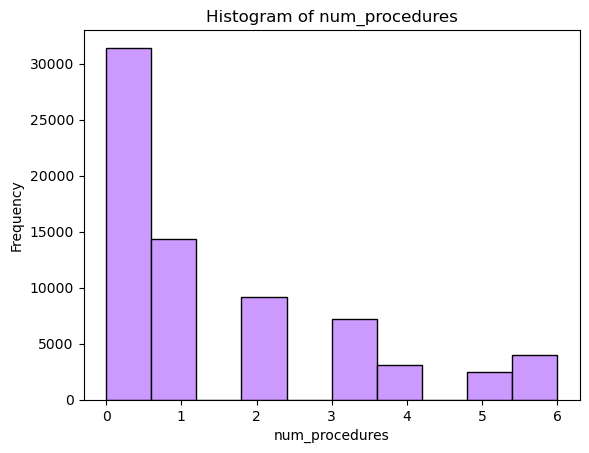

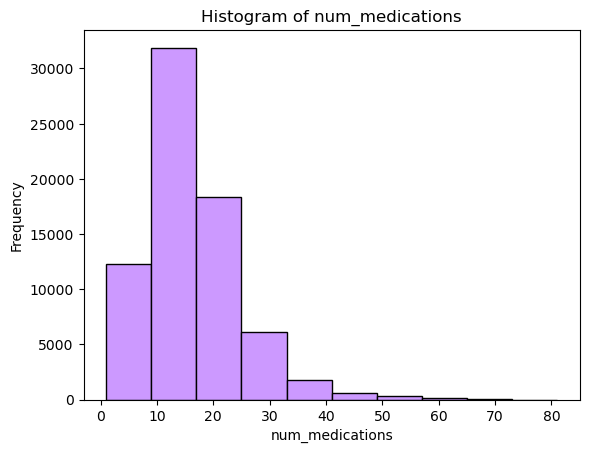

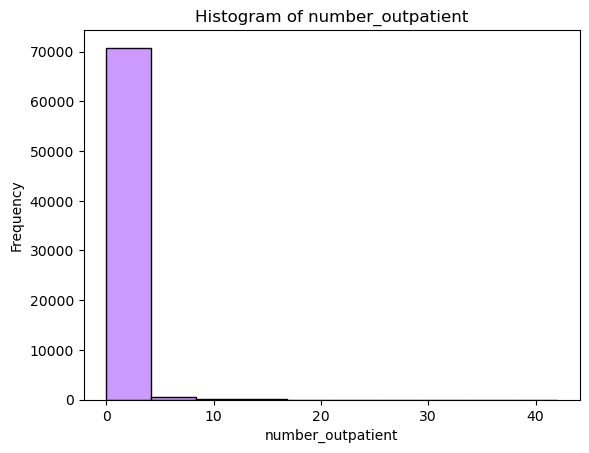

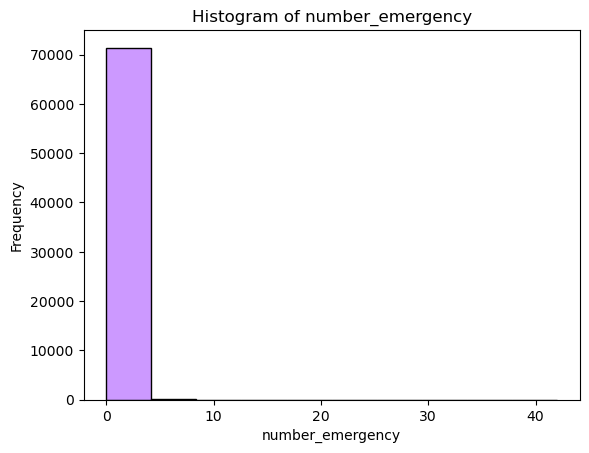

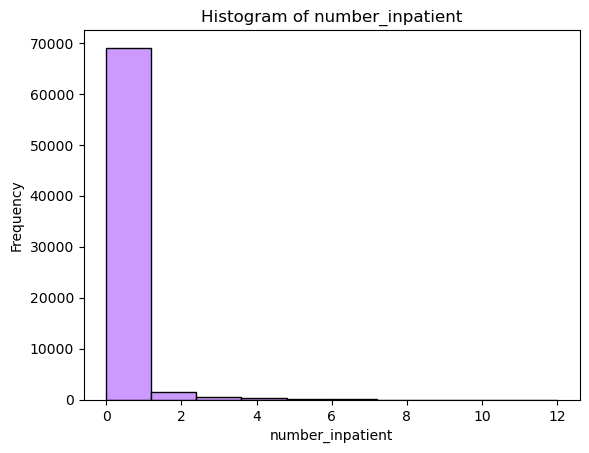

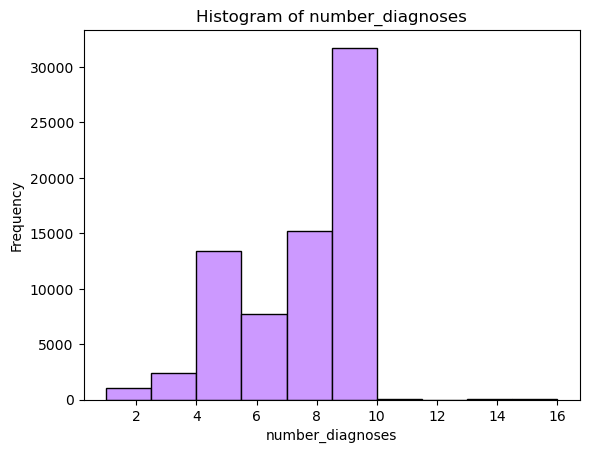

In [67]:
i = 0
length = len(num_cols)

while (i < length):
    lpc = (0.8, 0.6, 1.0)
    plt.hist(df[num_cols[i]], bins=10, color=lpc, edgecolor='black')
    plt.xlabel(num_cols[i])
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + num_cols[i])
    plt.show()
    i = i + 1

### Correlation Matrix

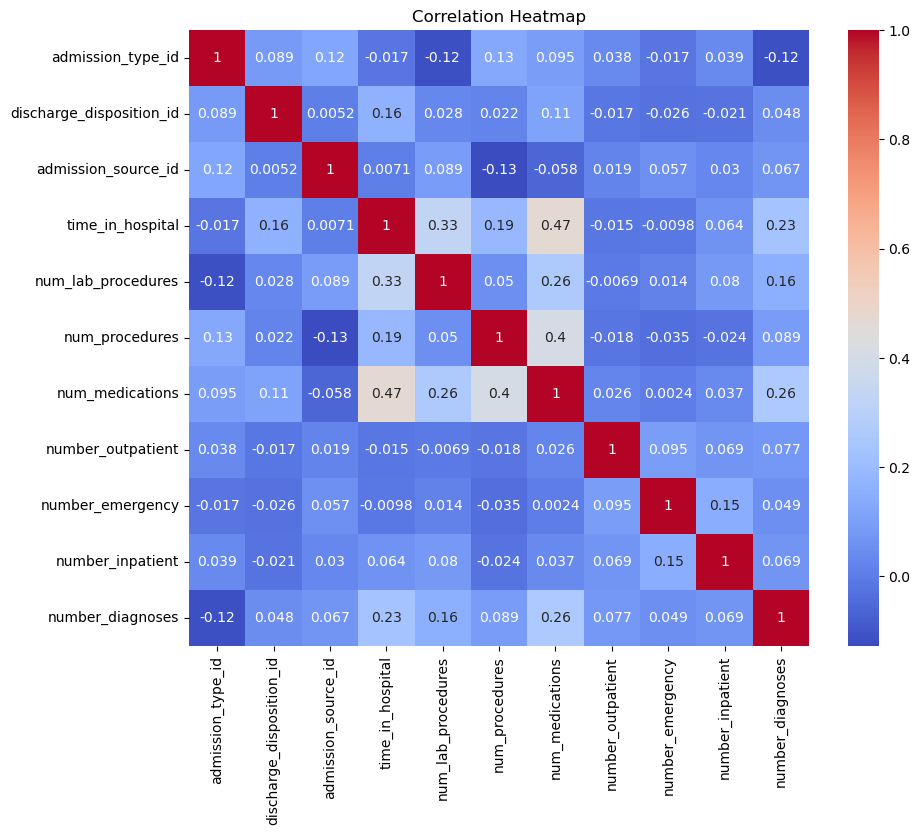

In [68]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [69]:
#correlation matrix
cm = df.corr()

#correlation threshold
corr_thresh = 0.2

#find the columns with high correlation
hcc = set()
nc = len(cm.columns)
i = 0
j = 1

while (i < nc):
    while(j < nc):
        if abs(cm.iloc[i, j]) > corr_thresh:
            hcc.add(cm.columns[i])
            hcc.add(cm.columns[j])
        j = j + 1
    i = i + 1

print("Columns with high correlation:", hcc)

Columns with high correlation: set()


**None of the numerical columns have high correlations with each other. This is good because the columns don't have any Multicollinearity (where two or more columns of independent variables are strongly related to each other).**

### Compare num_cols to y variables

In [70]:
print(num_cols)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


#### Boxplots for 'readmitted' column

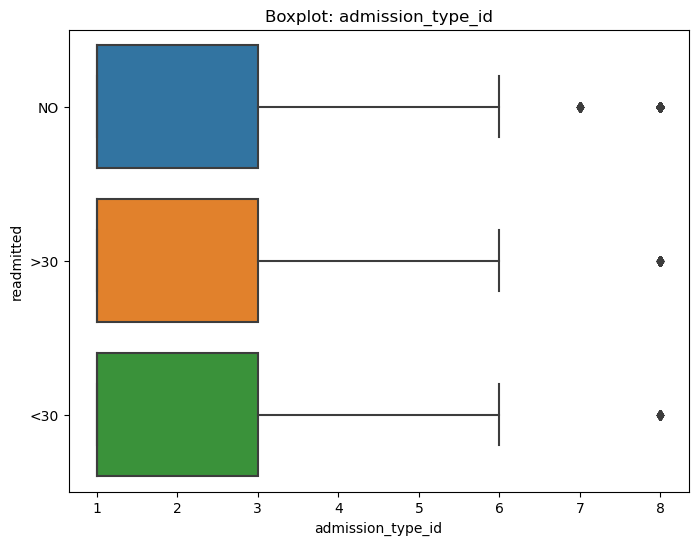

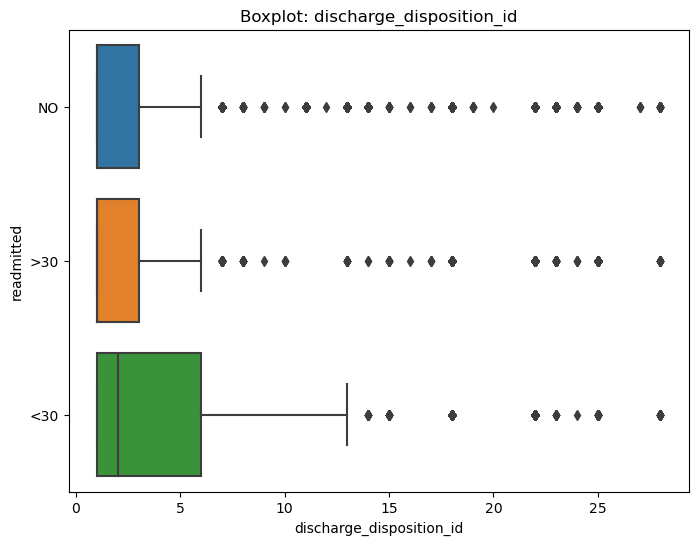

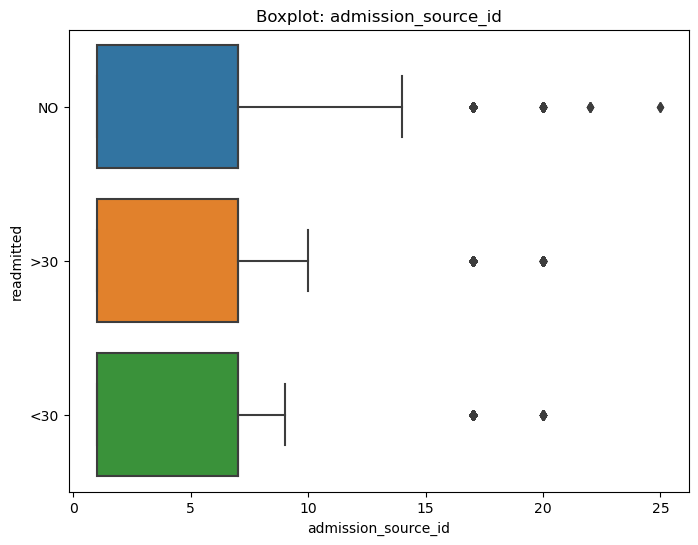

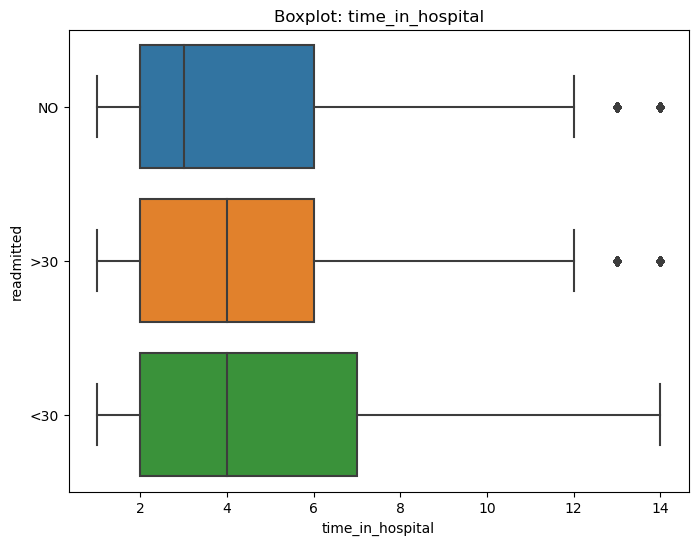

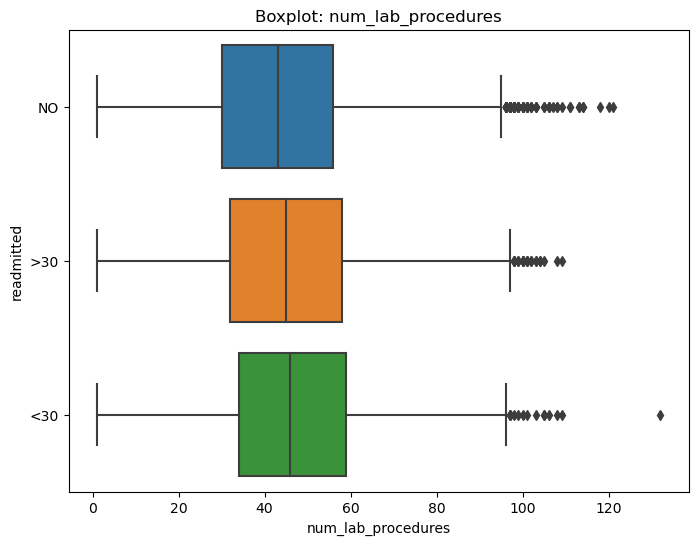

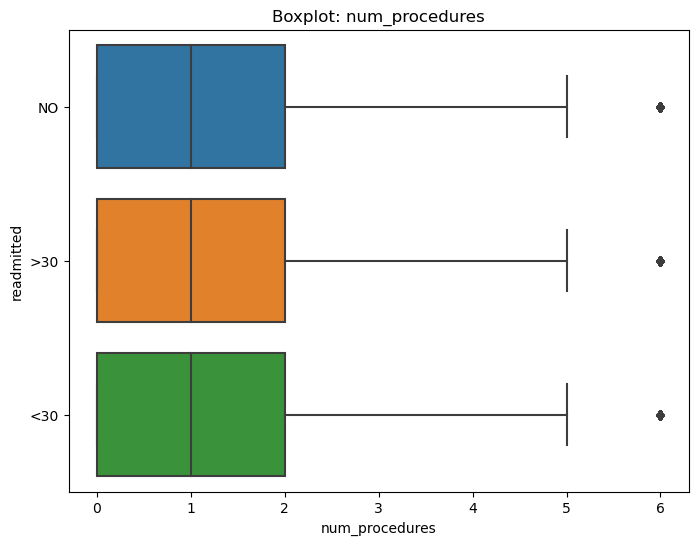

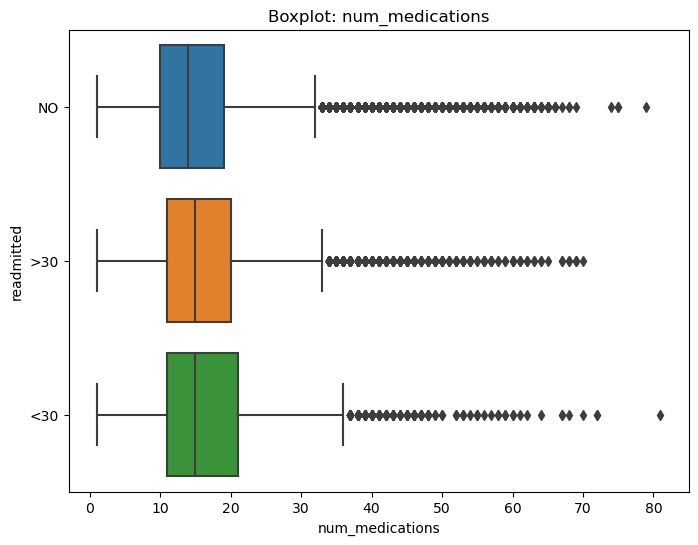

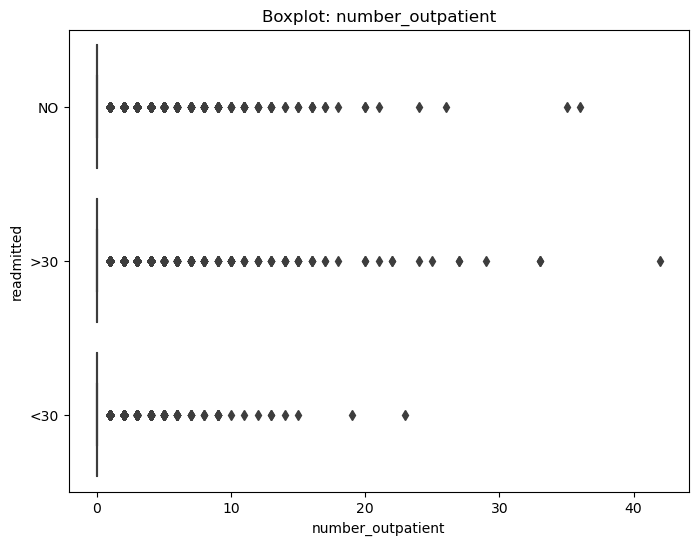

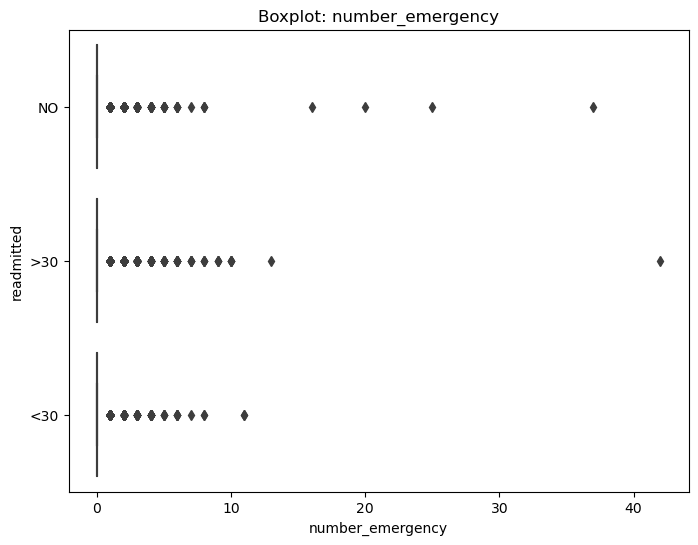

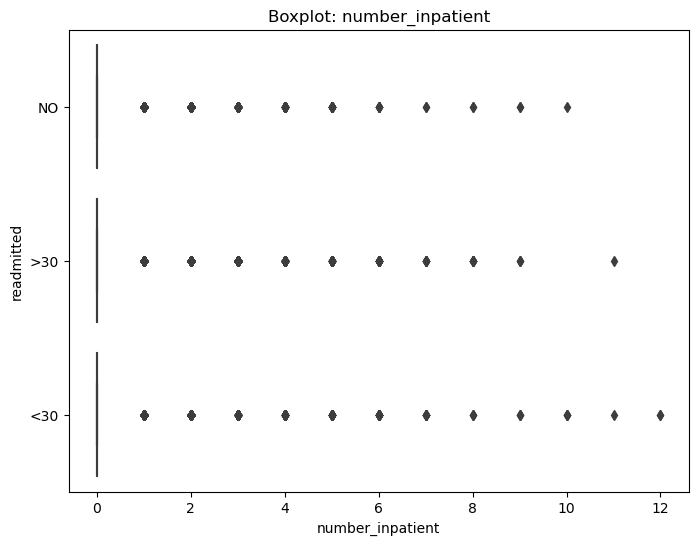

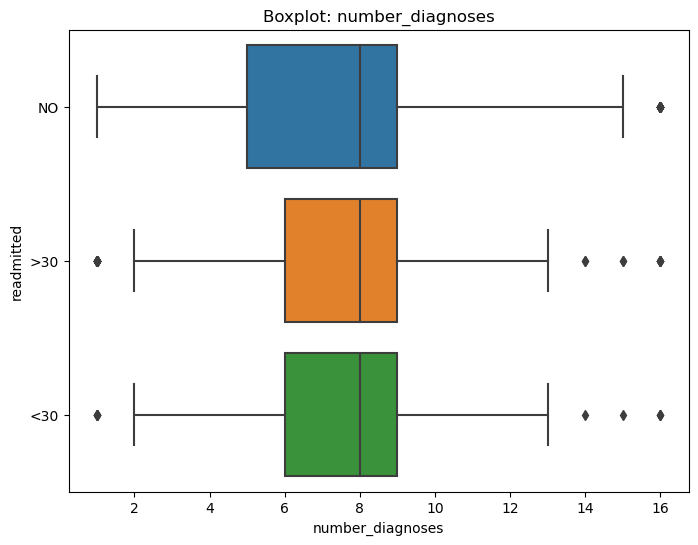

In [71]:
i = 0
length = len(num_cols)

while (i < length):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=num_cols[i], y='readmitted', data=df)
    plt.ylabel('readmitted')
    plt.xlabel(num_cols[i])
    plt.title(f'Boxplot: {num_cols[i]}')
    plt.show()
    i = i + 1

#### Boxplot for 'change' column

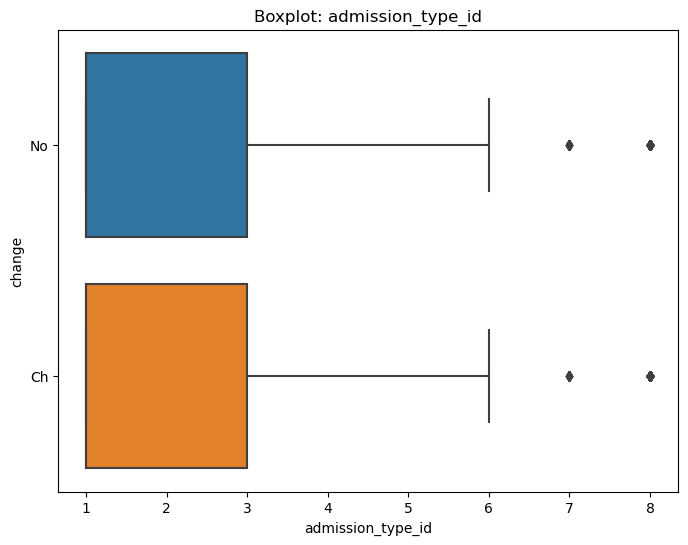

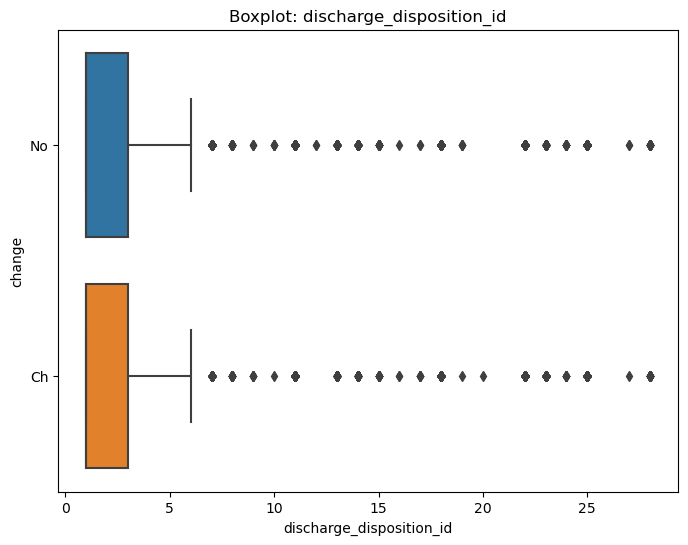

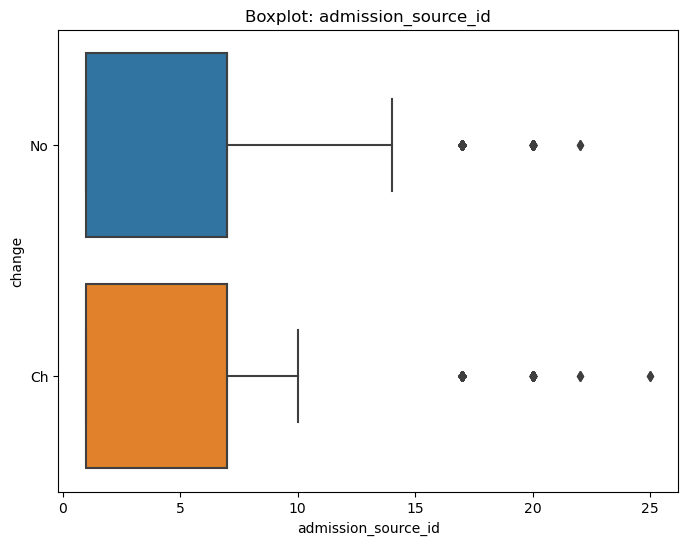

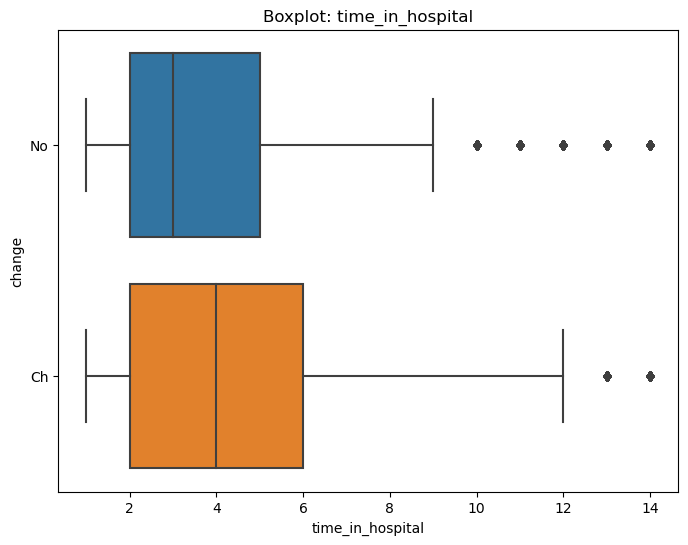

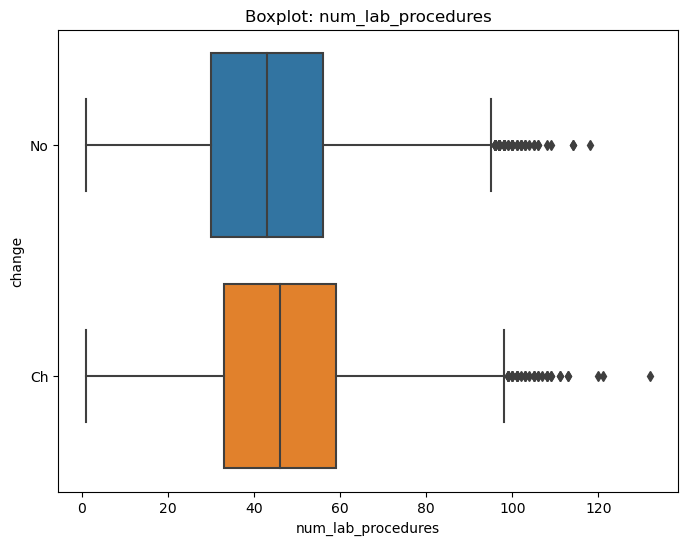

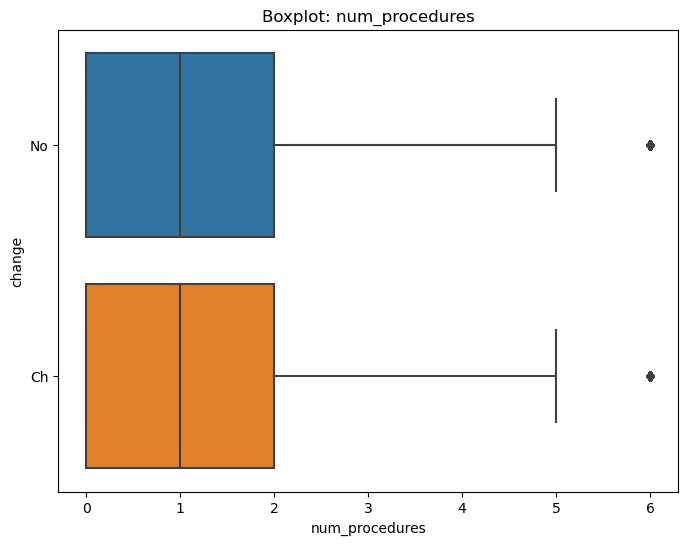

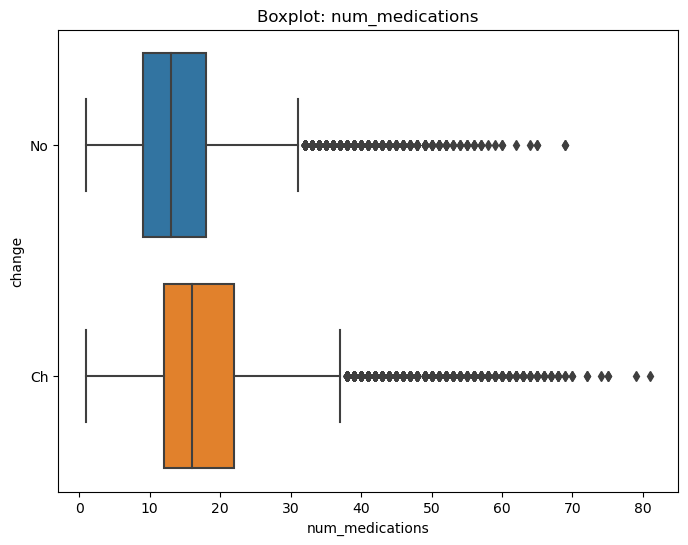

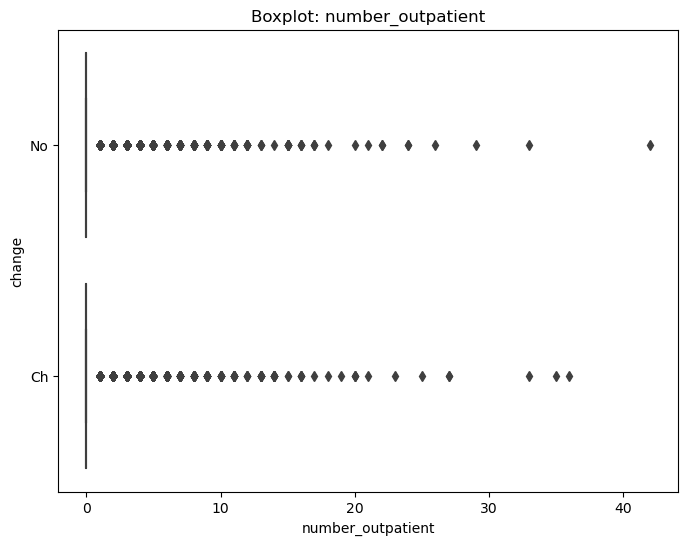

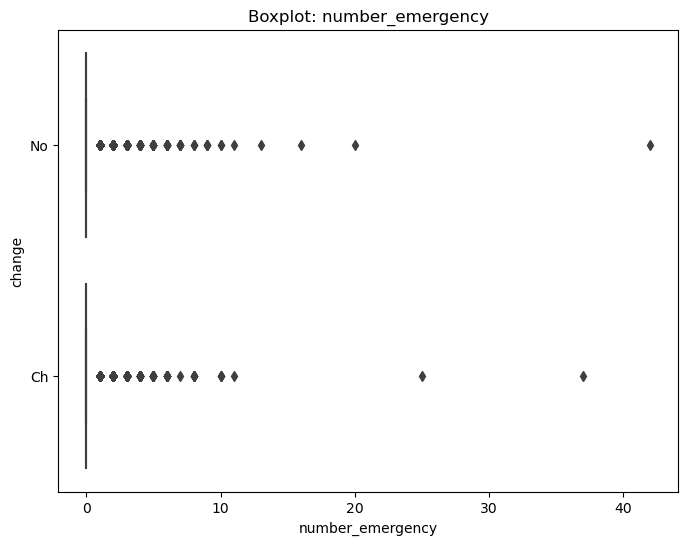

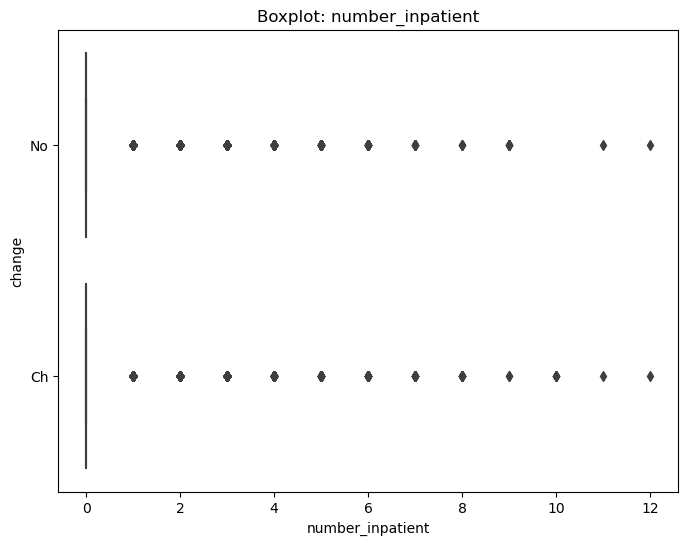

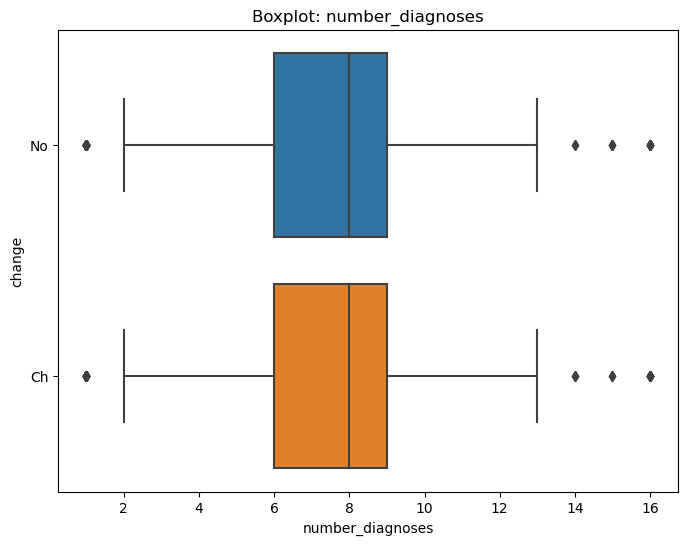

In [72]:
i = 0
length = len(num_cols)

while (i < length):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=num_cols[i], y='change', data=df)
    plt.ylabel('change')
    plt.xlabel(num_cols[i])
    plt.title(f'Boxplot: {num_cols[i]}')
    plt.show()
    i = i + 1

#### Boxplot for 'diabetesMed' column

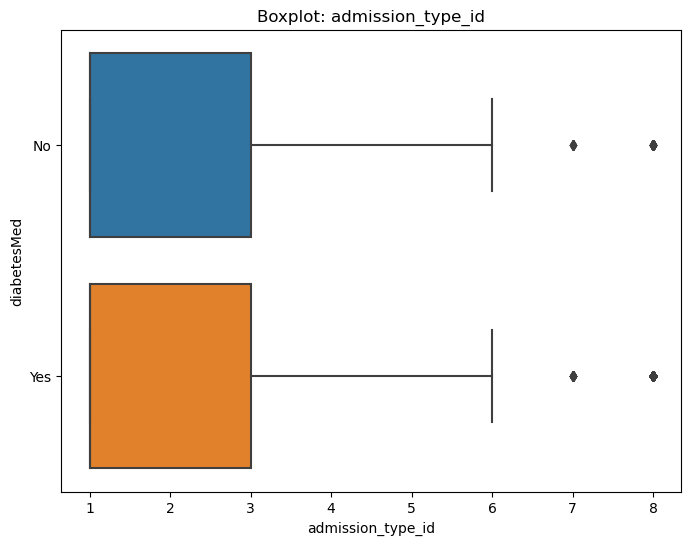

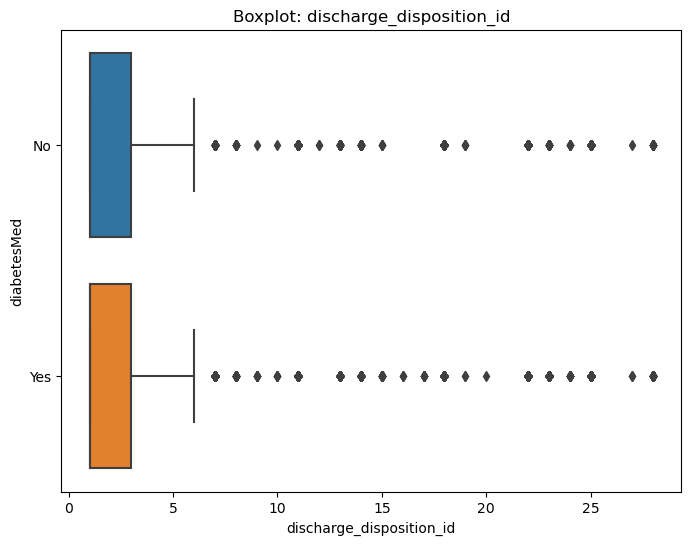

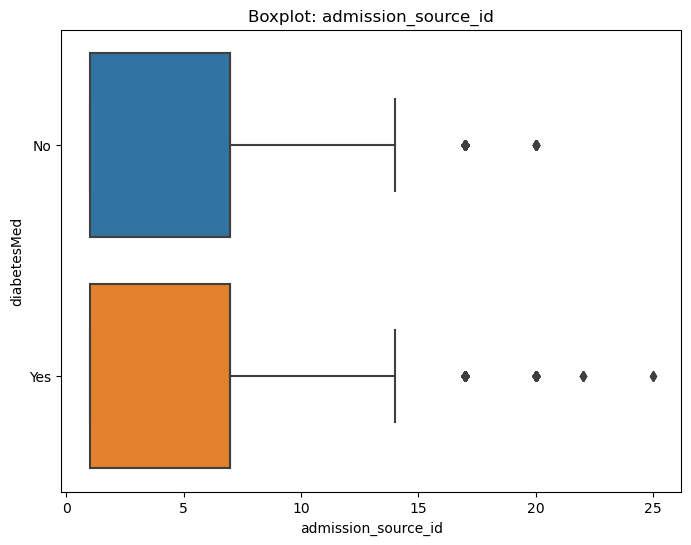

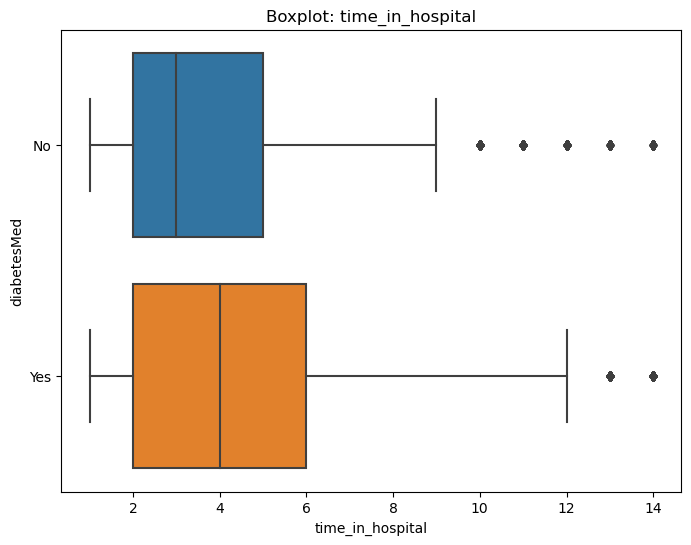

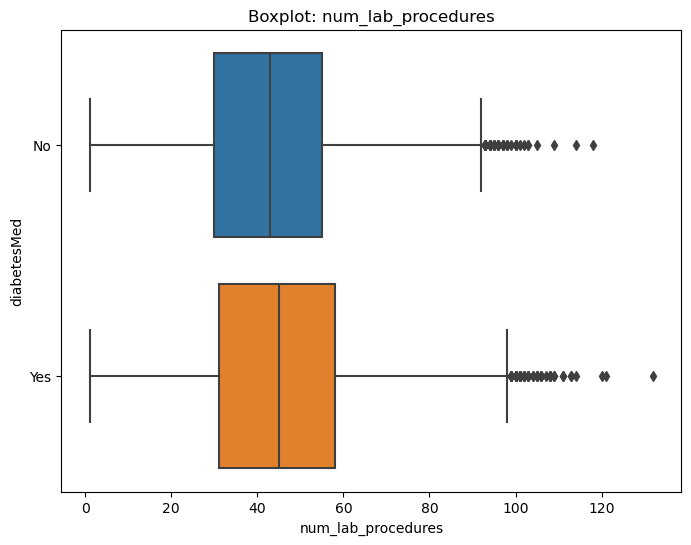

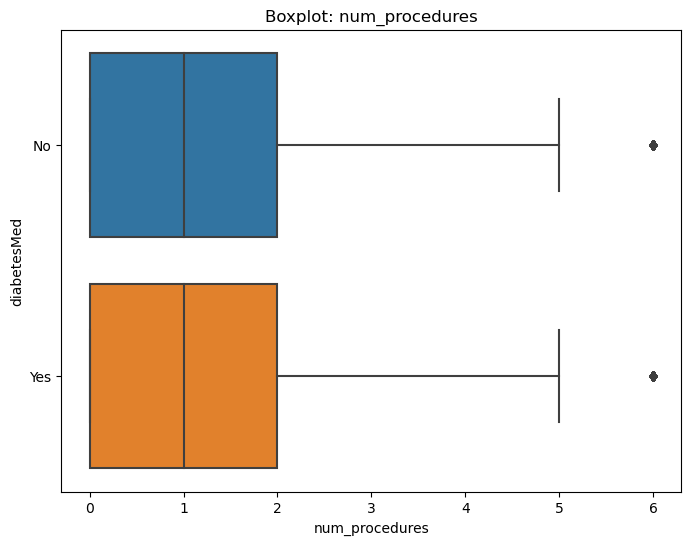

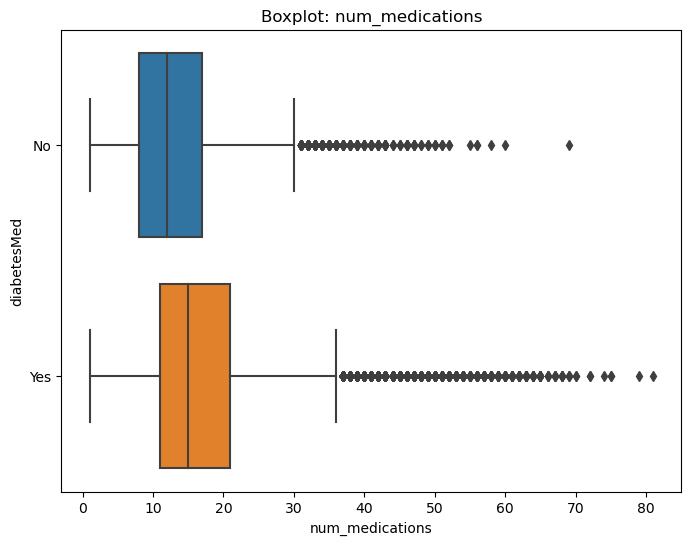

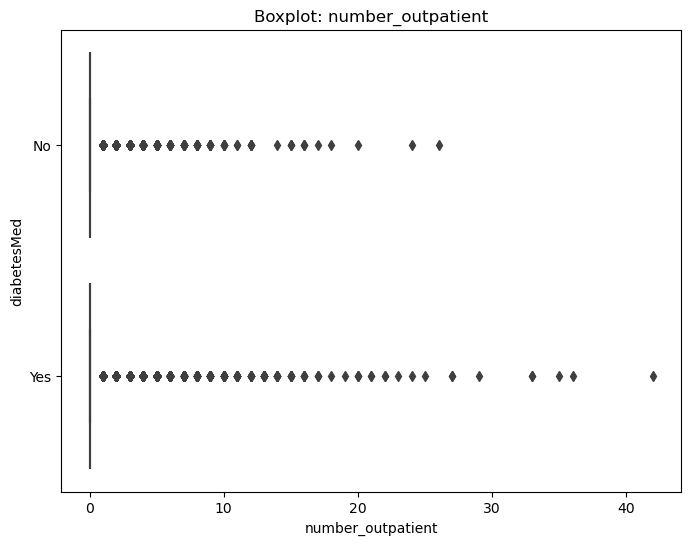

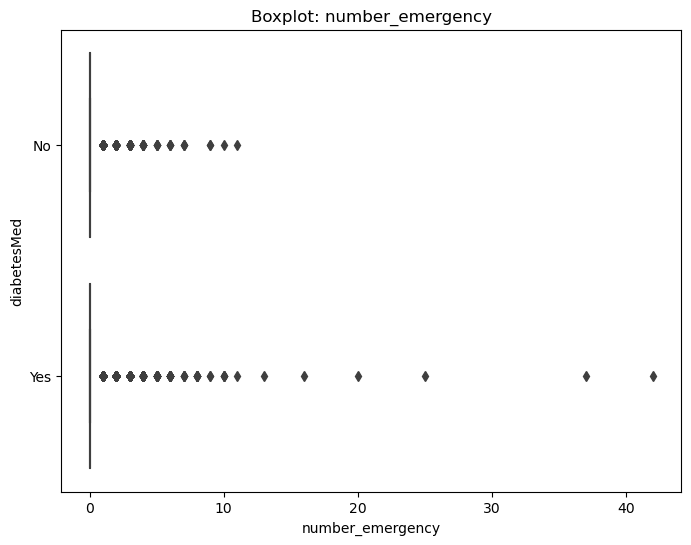

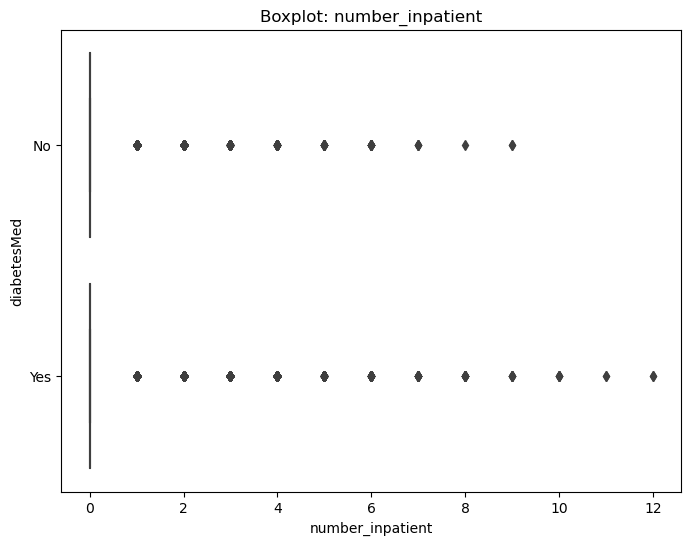

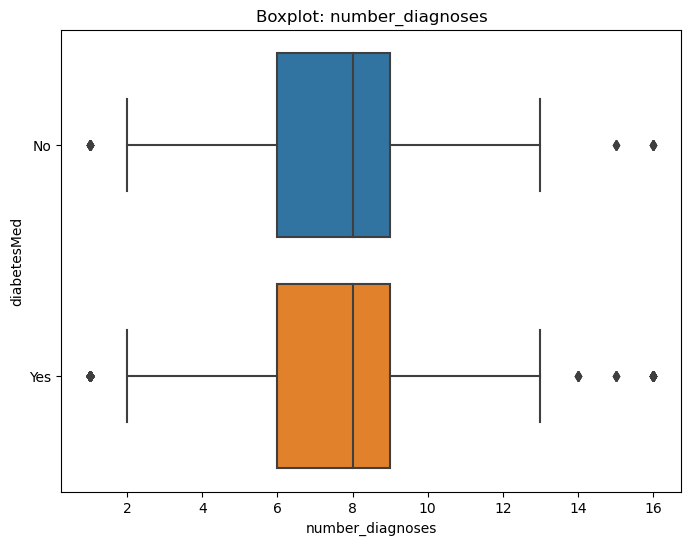

In [73]:
i = 0
length = len(num_cols)

while (i < length):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=num_cols[i], y='diabetesMed', data=df)
    plt.ylabel('diabetesMed')
    plt.xlabel(num_cols[i])
    plt.title(f'Boxplot: {num_cols[i]}')
    plt.show()
    i = i + 1

**I am going to explore the data that visually looks like it has the most outliers. I am going to calculate the percentage of outliers for each column and store it in the above dictionary**

In [74]:
print(num_cols)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [75]:
#dataframes split
y_var_l = ['diabetesMed', 'readmitted', 'change']

In [76]:
print(num_cols)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [77]:
i = 0
length1 = len(y_var_l)
dict_oa = {'column_names': num_cols}
dict_rows = {'column_names': num_cols}

while (i < length1):
    y_var = y_var_l[i]
    length2 = len(num_cols)
    
    j = 0
    
    #define empty list
    y_list = []
    row_list = []
    
    #define empty columns
    tot_out = 0
    
    while (j < length2):
        #list of unique values in y variable column
        uvl = df[y_var].unique().tolist()
        
        k = 0
        length3 = len(uvl)
        
        column = num_cols[j]
        
        while (k < length3):
            val = uvl[k]
            df2 = df[df[y_var] == val]
            
            
            #quartiles 1 and 3
            q1 = df2[column].quantile(0.25)
            q3 = df2[column].quantile(0.75)
            
            #interquartile range
            IQR = q3 - q1
            
            #outlier range
            out_1 = q1 - (1.5*IQR)
            out_2 = q3 + (1.5*IQR)
            
            out_df = df2[(df2[column] >= out_1) & (df2[column] <= out_2)]
            
            dfs2 = df2.shape
            dfs2_rows = dfs2[0]
            ods = out_df.shape
            ods_rows = ods[0]
            ods_rows = dfs2_rows - ods_rows
            
            tot_out += ods_rows
            
            k = k + 1
        
        
        
        dfs = df.shape
        dfs_rows = dfs[0]
        
        percentage = (tot_out/dfs_rows) * 100
        percentage = round(percentage, 2)
        
        y_list.append(percentage)
        row_list.append(tot_out)
        j = j + 1
        
    dict_oa[y_var] = y_list
    dict_rows[y_var] = row_list
    
    i = i + 1
    
    

In [78]:
print(dict_oa)

{'column_names': ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'], 'diabetesMed': [0.44, 10.41, 17.56, 20.61, 20.76, 26.29, 29.03, 42.04, 49.31, 61.12, 61.45], 'readmitted': [0.44, 10.34, 17.48, 19.31, 19.49, 25.02, 28.69, 41.7, 48.98, 60.78, 60.88], 'change': [0.44, 10.41, 17.56, 21.97, 22.12, 27.65, 30.55, 43.56, 50.84, 62.64, 62.97]}


In [79]:
my_df = pd.DataFrame(dict_oa)
my_df.head()

,column_names,diabetesMed,readmitted,change
0,admission_type_id,0.44,0.44,0.44
1,discharge_disposition_id,10.41,10.34,10.41
2,admission_source_id,17.56,17.48,17.56
3,time_in_hospital,20.61,19.31,21.97
4,num_lab_procedures,20.76,19.49,22.12


In [80]:
my_df = my_df.sort_values(by='diabetesMed', ascending=False)
my_df.head()

,column_names,diabetesMed,readmitted,change
10,number_diagnoses,61.45,60.88,62.97
9,number_inpatient,61.12,60.78,62.64
8,number_emergency,49.31,48.98,50.84
7,number_outpatient,42.04,41.70,43.56
6,num_medications,29.03,28.69,30.55


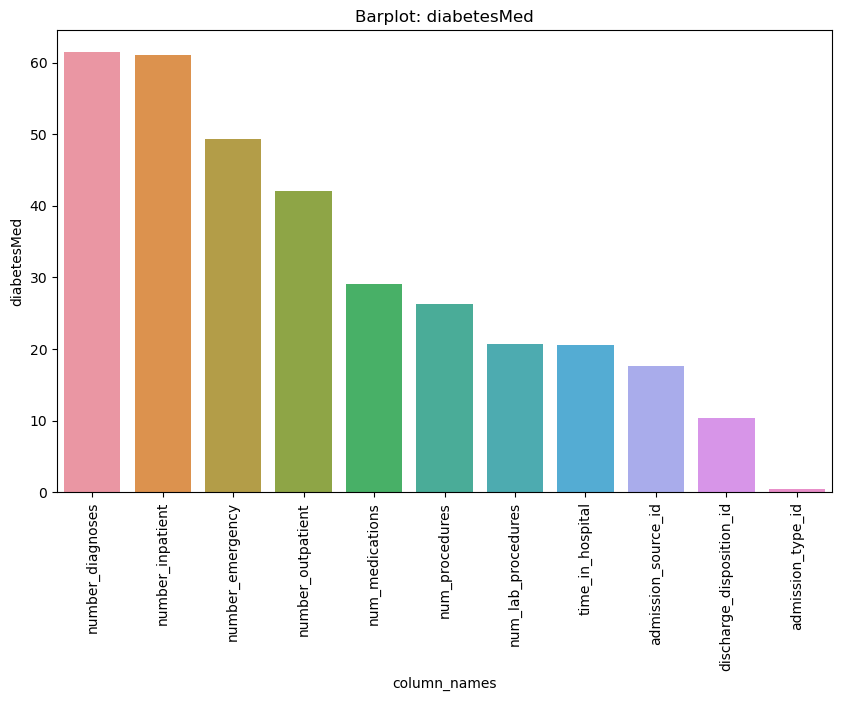

In [81]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='column_names', y='diabetesMed', data=my_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('column_names')
plt.ylabel('diabetesMed')
plt.title('Barplot: diabetesMed')
plt.show()

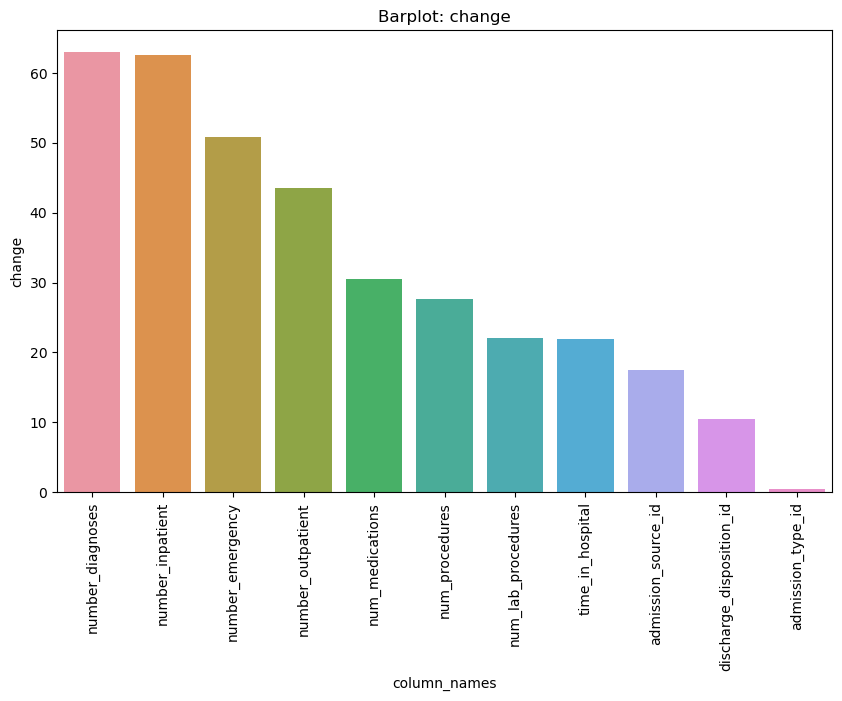

In [82]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='column_names', y='change', data=my_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('column_names')
plt.ylabel('change')
plt.title('Barplot: change')
plt.show()

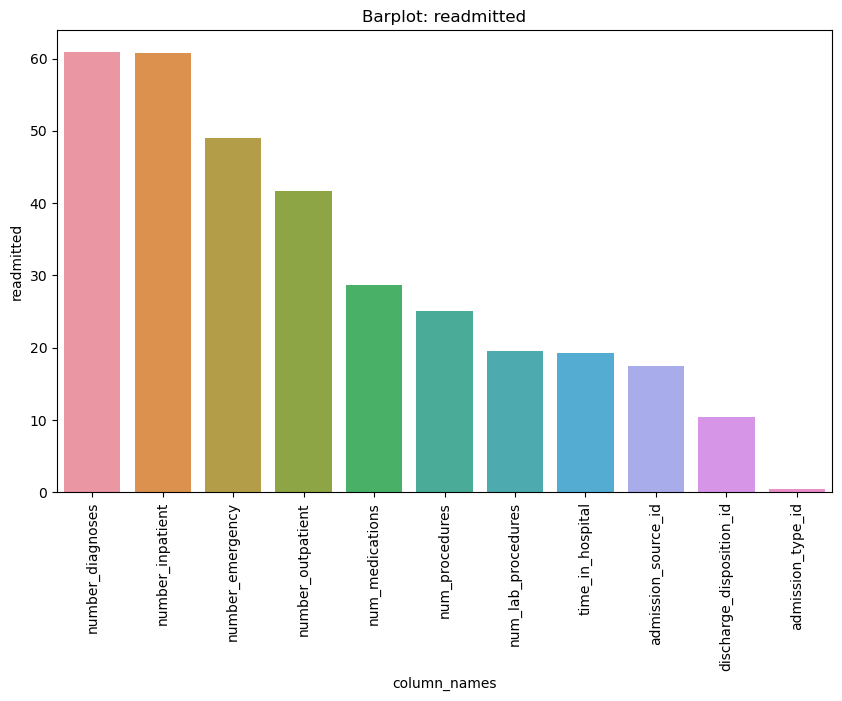

In [83]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='column_names', y='readmitted', data=my_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('column_names')
plt.ylabel('readmitted')
plt.title('Barplot: readmitted')
plt.show()

**We see here that number_diagnoses, number_inpatient, number_emergency, and, number_outpatient, has at least 40% or more outliers, while it could be useful in the long run if we collect more data but for now we'll have to drop these columns.**

In [84]:
del df['number_diagnoses']
del df['number_inpatient']
del df['number_outpatient']
del df['number_emergency']

**Actually let's remove all columns that have more than 20% outliers**

In [85]:
del df['num_medications']
del df['num_procedures']

**Update num_cols**

In [86]:
print(num_cols)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [87]:
num_df = df.select_dtypes(include='number')
num_cols = num_df.columns.tolist()
print(num_cols)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures']


### Remove rows with outliers

In [88]:
df1 = df.copy()
df1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,MC,Cardiology,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,CP,Surgery-Thoracic,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,MC,Orthopedics-Reconstructive,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,MC,Family/GeneralPractice,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [89]:
df1.shape

(71518, 41)

**let's choose diabetesMed to use to get rid of the outliers**

In [90]:
i = 0
length1 = len(num_cols)

col_names = df1.columns
res_df = pd.DataFrame(columns=col_names)
 
while (i < length1):
    column = num_cols[i]
    uvl = df1['diabetesMed'].unique().tolist()
    j = 0
    length2 = len(uvl)
    
    while (j < length2):
        val = uvl[j]
        df2 = df1[df1['diabetesMed'] == val]
            
            
        #quartiles 1 and 3
        q1 = df2[column].quantile(0.25)
        q3 = df2[column].quantile(0.75)
            
        #interquartile range
        IQR = q3 - q1
            
        #outlier range
        out_1 = q1 - (1.5*IQR)
        out_2 = q3 + (1.5*IQR)
        
        no_out = df2[(df2[column] >= out_1) & (df2[column] <= out_2)]
        res_df = pd.concat([res_df, no_out], axis=0)
        
        j += 1
    i += 1

In [91]:
res_df.shape

(342746, 41)

# Model Building

## Encode Categorical Variables

In [92]:
obj_df = df1.select_dtypes(include='object')
obj_cols = obj_df.columns.tolist()
print(obj_cols)

['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [93]:
df1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,MC,Cardiology,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,CP,Surgery-Thoracic,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,MC,Orthopedics-Reconstructive,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,MC,Family/GeneralPractice,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [94]:
df1['change'] = df1['change'].replace('Ch', 'Yes')
df1['readmitted'] = df1['readmitted'].replace('NO', 'No')

In [95]:
df1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,7,3,MC,Cardiology,59,...,No,Up,No,No,No,No,No,Yes,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,CP,Surgery-Thoracic,11,...,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Male,[30-40),1,1,7,2,MC,Orthopedics-Reconstructive,44,...,No,Up,No,No,No,No,No,Yes,Yes,No
4,Caucasian,Male,[40-50),1,1,7,1,MC,Family/GeneralPractice,51,...,No,Steady,No,No,No,No,No,Yes,Yes,No


In [96]:
encoder = LabelEncoder()
df1[obj_cols] = df1[obj_cols].apply(encoder.fit_transform)

In [97]:
df1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,2,0,0,6,25,1,1,7,36,41,...,0,1,1,0,0,0,0,0,0,2
1,2,0,1,1,1,7,3,7,3,59,...,0,3,1,0,0,0,0,1,1,1
2,0,0,2,1,1,7,2,3,66,11,...,0,1,1,0,0,0,0,0,1,2
3,2,1,3,1,1,7,2,7,28,44,...,0,3,1,0,0,0,0,1,1,2
4,2,1,4,1,1,7,1,7,11,51,...,0,2,1,0,0,0,0,1,1,2


In [98]:
df1['readmitted'].unique().tolist()

[2, 1, 0]

**2 - No**<br>
**1 - >30**<br>
**0 - <30**

In [99]:
df1['change'].unique().tolist()

[0, 1]

**0 - No**<br>
**1 - Yes**

In [100]:
df1['diabetesMed'].unique().tolist()

[0, 1]

**0 - No**<br>
**1 - Yes**

## define y and x features

In [101]:
df4 = df1.copy()
del df4['change']
del df4['diabetesMed']
del df4['readmitted']
features = df4.columns.tolist()
print(features)

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone']


In [102]:
x = df1[features]
y = df1[['change', 'diabetesMed', 'readmitted']]

In [103]:
#test train split 70/30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Establish a Baseline

In [121]:
#calc the mean for each y variable from training data
mean_y_train = y_train.mean()
mean_y_train.head()

change         0.448264
diabetesMed    0.757740
readmitted     1.507511
dtype: float64

In [123]:
# Create predictions using the mean values
y_pred_mean = pd.DataFrame(np.full_like(y_test, mean_y_train), columns=y_test.columns)
y_pred_mean.head()

,change,diabetesMed,readmitted
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [106]:
#Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred_mean)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.63


**We need a mse of 0.63 or less for the model to be considered a good model for the data**

# Multi Output Regressor: Linear Regression

In [107]:
# Create a multi-output regression model
model = MultiOutputRegressor(LinearRegression())

In [108]:
#fit the model
model = model.fit(X_train, y_train)

In [109]:
#Predict
y_pred = model.predict(X_test)

In [110]:
#mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.24


**We get an mse of 0.24, which is smaller than 0.64, this means that the Linear Regression model is a good model**

# Random Forest Regressor

In [111]:
#Create a random forest regressor model
model_rfr = RandomForestRegressor()

In [112]:
#fit the model
mode_rfr = model_rfr.fit(X_train, y_train)

In [113]:
#predict
y_pred = model_rfr.predict(X_test)

In [114]:
#mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.14


**We get an mse of 0.14, which is smaller than 0.64, this means that the Linear Regression model is a good model**

# Gradient Boosting Regressor

In [115]:
#define gradient boosting regressor
model_mog = MultiOutputRegressor(GradientBoostingRegressor())

In [116]:
#fit the model
model_mog = model_mog.fit(X_train, y_train)

In [117]:
#predict
y_pred = model_mog.predict(X_test)

In [118]:
#mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.16


**We get an mse of 0.16, which is smaller than 0.64, this means that the Linear Regression model is a good model**